# Project Name: Weather Risk Management 

## Model Number : 2

## Description: Model for Predicting the Weekly Sales from Different Walmart Store Sales dataset dated from 2010-02-05 to 2012-11-01

## Installing Necesaary Libraries for Plotting Graphs, Dealing with Datasets etc.,

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']= (20,7)

## Three Different Datasets from Walmart Store Sales were Joined, Merged accordingly and finally stored on a single file with the help of PySpark RDD's  

In [2]:
dataset= pd.read_csv('train_final.csv')

In [3]:
dataset.head(2)

,Unnamed: 0,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True


## MongoDB API and Storing the Data Frame in to the MongoDB

In [43]:
dataset_json= dataset.to_json(orient= 'records')

In [44]:
from bson import json_util
data = json_util.loads(dataset_json)

In [45]:
import pymongo 
mng_client = pymongo.MongoClient('localhost', 27017)
mng_db = mng_client['walmart'] 
collection_name = 'walmart_data'
db_cm = mng_db[collection_name]
 
#Insert Data
db_cm.insert(data)

C:\Users\saikarthik\AppData\Local\Programs\Python\Python37-32\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: insert is deprecated. Use insert_one or insert_many instead.
  


[ObjectId('5fdd4c2cd70fdf3f05713bac'),
 ObjectId('5fdd4c2cd70fdf3f05713bad'),
 ObjectId('5fdd4c2cd70fdf3f05713bae'),
 ObjectId('5fdd4c2cd70fdf3f05713baf'),
 ObjectId('5fdd4c2cd70fdf3f05713bb0'),
 ObjectId('5fdd4c2cd70fdf3f05713bb1'),
 ObjectId('5fdd4c2cd70fdf3f05713bb2'),
 ObjectId('5fdd4c2cd70fdf3f05713bb3'),
 ObjectId('5fdd4c2cd70fdf3f05713bb4'),
 ObjectId('5fdd4c2cd70fdf3f05713bb5'),
 ObjectId('5fdd4c2cd70fdf3f05713bb6'),
 ObjectId('5fdd4c2cd70fdf3f05713bb7'),
 ObjectId('5fdd4c2cd70fdf3f05713bb8'),
 ObjectId('5fdd4c2cd70fdf3f05713bb9'),
 ObjectId('5fdd4c2cd70fdf3f05713bba'),
 ObjectId('5fdd4c2cd70fdf3f05713bbb'),
 ObjectId('5fdd4c2cd70fdf3f05713bbc'),
 ObjectId('5fdd4c2cd70fdf3f05713bbd'),
 ObjectId('5fdd4c2cd70fdf3f05713bbe'),
 ObjectId('5fdd4c2cd70fdf3f05713bbf'),
 ObjectId('5fdd4c2cd70fdf3f05713bc0'),
 ObjectId('5fdd4c2cd70fdf3f05713bc1'),
 ObjectId('5fdd4c2cd70fdf3f05713bc2'),
 ObjectId('5fdd4c2cd70fdf3f05713bc3'),
 ObjectId('5fdd4c2cd70fdf3f05713bc4'),
 ObjectId('5fdd4c2cd70fdf

## Initial Descriptive Analysis of Walmart Data

In [4]:
dataset.describe()

,Unnamed: 0,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000
mean,210784.500000,22.200546,44.260317,15981.258123,136727.915739,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289
std,121696.920828,12.785297,30.492054,22711.183519,60980.583328,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296
min,0.000000,1.000000,1.000000,-4988.940000,34875.000000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000
25%,105392.250000,11.000000,18.000000,2079.650000,93638.000000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000
50%,210784.500000,22.000000,37.000000,7612.030000,140167.000000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000
75%,316176.750000,33.000000,74.000000,20205.852500,202505.000000,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000
max,421569.000000,45.000000,99.000000,693099.360000,219622.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000


## Finding Correlation Value Between Variables 

In [5]:
dataset.corr().head(2)

,Unnamed: 0,Store,Dept,Weekly_Sales,IsHoliday_x,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
Unnamed: 0,1.000000,0.999198,0.045990,-0.082372,-0.000530,-0.175516,-0.053526,0.068573,-0.115779,-0.034511,-0.030936,-0.008511,-0.026748,-0.218301,0.213702,-0.000530
Store,0.999198,1.000000,0.024004,-0.085195,-0.000548,-0.182881,-0.050097,0.065290,-0.119588,-0.035173,-0.031556,-0.009941,-0.026634,-0.211088,0.208552,-0.000548


## EDA- Scatter Plot Between Temperature vs Weekly Sales

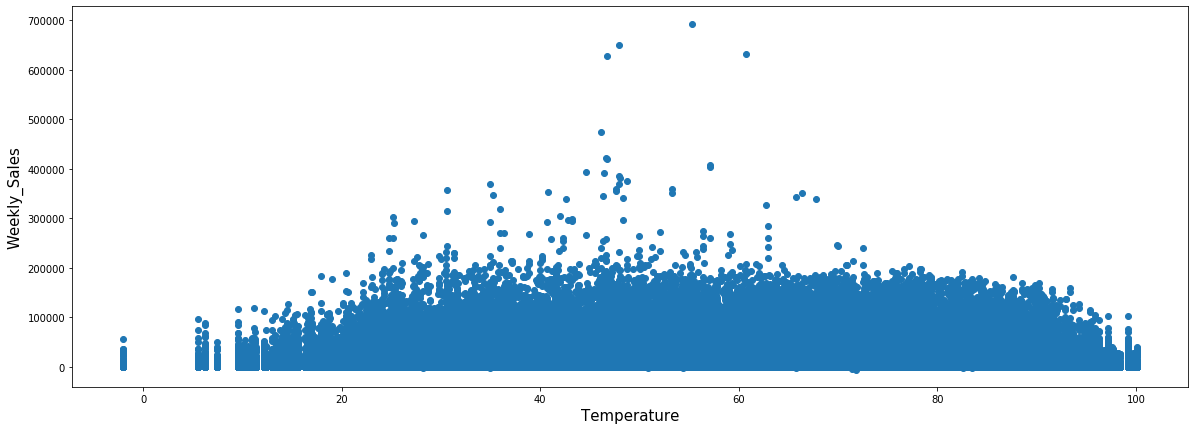

In [86]:
plt.figure()
plt.scatter(dataset['Temperature'] , dataset['Weekly_Sales'])
plt.ylabel('Weekly_Sales', fontsize=15)
plt.xlabel('Temperature', fontsize=15)
plt.rcParams['figure.figsize']= (20,7)

### Explanation: The plot given above shows less linearity between temperature vs weekly sales. So, we are trying to take temperatures ranges say 1 to 50 and summing up the weekly sales.

## Feature Selection and Extraction 

In [11]:
Dataset_Predict= dataset.drop(columns=["Unnamed: 0", "Store", "Dept", "Date", "IsHoliday_x","Type", "Size","Fuel_Price","MarkDown1", "MarkDown2", "MarkDown3","MarkDown4","MarkDown5","CPI","Unemployment","IsHoliday_y"])
Dataset_Predict.head()

Target_LR= Dataset_Predict.drop(columns= ["Temperature"])
Input_LR= Dataset_Predict.drop(columns= ["Weekly_Sales"])

## Maximum Value of Input and Target

In [12]:
def bins(Target_LR, Input_LR):
    maxs_target= Target_LR.max()
    input_target= Target_LR.max()
    
    return(maxs_target, input_target )

In [13]:
bins(Target_LR, Input_LR)

(Weekly_Sales    693099.36
 dtype: float64, Weekly_Sales    693099.36
 dtype: float64)

## Extracting the Temperature Range from 1 to 50 Farenheit

In [14]:
def bins_40_50(Dataset_Predict):
    temp_range= Dataset_Predict[(Dataset_Predict["Temperature"]>1)&(Dataset_Predict["Temperature"]<70)]
    temp_group= temp_range.groupby(['Temperature']).sum()
    return(temp_group)

In [15]:
ranges= bins_40_50(Dataset_Predict)
ranges= pd.DataFrame(ranges).reset_index()
ranges.head(2)

,Temperature,Weekly_Sales
0,5.54,817485.14
1,6.23,1083071.14


## Scatter Plot Between Temperature vs Weekly Sales within Range

Text(0.5, 0, 'Temperature')

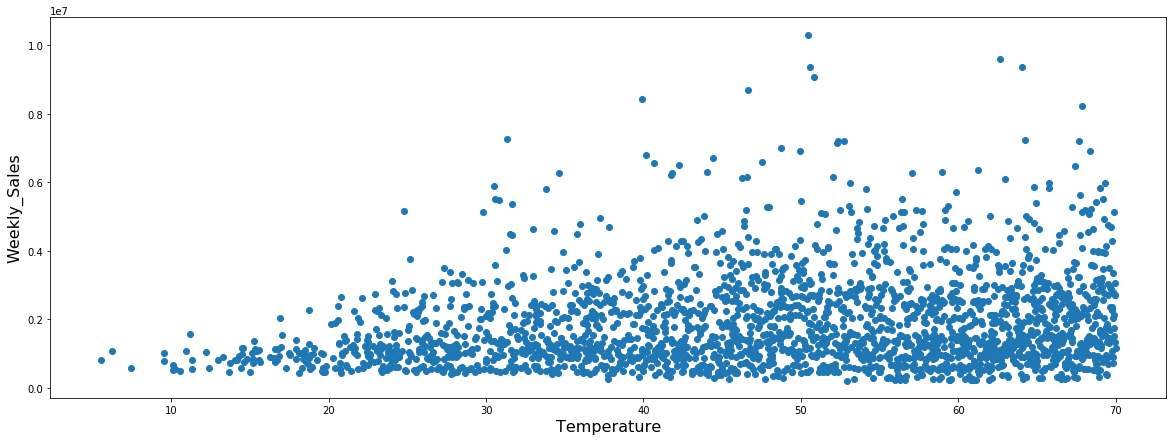

In [18]:
plt.figure()
plt.scatter(ranges['Temperature'] , ranges['Weekly_Sales'])
plt.ylabel('Weekly_Sales', fontsize=16)
plt.xlabel('Temperature', fontsize=16)

## Correlation between Temperature and Weekly Sales

In [19]:
ranges.corr()

,Temperature,Weekly_Sales
Temperature,1.000000,0.184128
Weekly_Sales,0.184128,1.000000


In [20]:
Input_LR_scaled= ranges.Temperature
Target_LR_scaled= ranges.Weekly_Sales

## Finding Null Values 

In [21]:
ranges.isnull().sum()

Temperature     0
Weekly_Sales    0
dtype: int64

## Standardizing the Inputs and Targets


In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(Input_LR)
scaler.fit(Target_LR)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [23]:
Input_LR_scaled = scaler.transform(Input_LR)
Target_LR_scaled = scaler.transform(Target_LR)

## Necessary Libraries for Model Building

In [24]:
#!pip install xgboost

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
#from xgboost import XGBRegressor

## Test / Train Split 

In [26]:
x_train, x_test, y_train, y_test = train_test_split(Input_LR_scaled, Target_LR_scaled, test_size=0.2, random_state=365)

## Linear Modelling

In [27]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
y_pred = reg.predict(x_train)

## Linear Model Evaluation

In [29]:
LR_MAE = print("Linear Regression - Mean Absolute Error: ", metrics.mean_absolute_error(y_train, y_pred)) 
LR_MSE = print("Linear Regression - Mean Square Error: ", metrics.mean_squared_error(y_train, y_pred)) 
LR_RMSE = print("Linear Regression - Root Mean Square Error: ", np.sqrt(metrics.mean_squared_error(y_train, y_pred)))


score = r2_score(y_train, y_pred)
print("R^2:", score)

Linear Regression - Mean Absolute Error:  0.6683509443353831
Linear Regression - Mean Square Error:  1.0054524134260223
Linear Regression - Root Mean Square Error:  1.0027225007079588
R^2: 2.670419461003881e-06


In [30]:
LR = pd.DataFrame({'Model_Name':['Linear Regression'],'MAE':[metrics.mean_absolute_error(y_train, y_pred)],
                   'MSE': [metrics.mean_squared_error(y_train, y_pred)],
                   'RMSE': [metrics.mean_squared_error(y_train, y_pred)],
                    'R^2': [r2_score(y_train, y_pred)]})

In [31]:
LR

,Model_Name,MAE,MSE,RMSE,R^2
0,Linear Regression,0.668351,1.005452,1.005452,0.000003


## Scatter Plot between Targets and the Predictions Linear Model

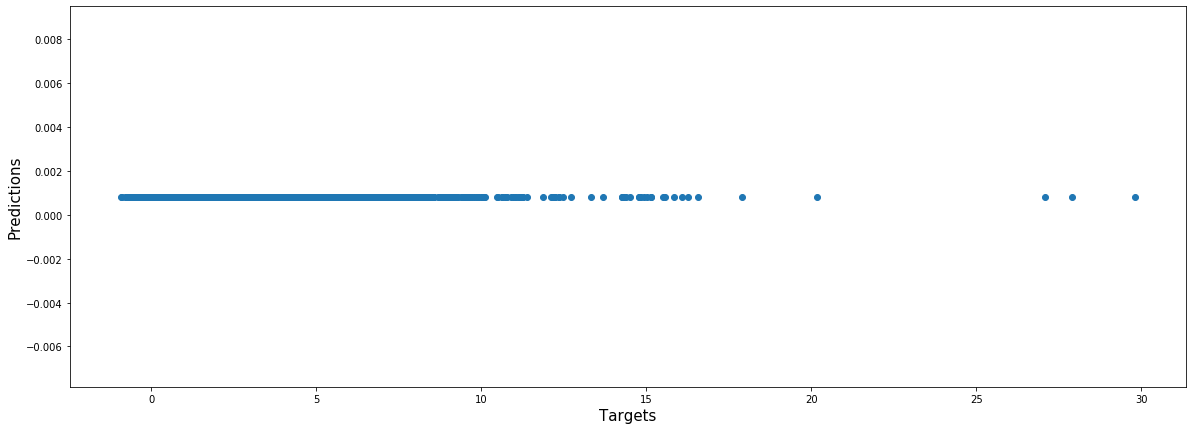

In [70]:
plt.scatter(y_train, y_pred)
plt.xlabel('Targets', fontsize=15 )
plt.ylabel('Predictions', fontsize=15 )
plt.show()

## KNN- Regressor 

In [71]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [72]:
y_pred = knn.predict(x_train)

## KNN Model Evaluation

In [73]:
print("KNN- Regressor - Mean Absolute Error: ", metrics.mean_absolute_error(y_train, y_pred)) 
print("KNN- Regressor - Mean Square Error: ", metrics.mean_squared_error(y_train, y_pred)) 
print("KNN- Regressor - Root Mean Square Error: ", np.sqrt(metrics.mean_squared_error(y_train, y_pred)))


score = r2_score(y_train, y_pred)
print("R^2:", score)

KNN- Regressor - Mean Absolute Error:  0.7012825399406086
KNN- Regressor - Mean Square Error:  1.1352022894779163
KNN- Regressor - Root Mean Square Error:  1.0654587225594037
R^2: -0.12904324745067064


In [74]:
KNN = pd.DataFrame({'Model_Name':['KNN Regressor'],
                    'MAE':[metrics.mean_absolute_error(y_train, y_pred)],
                   'MSE': [metrics.mean_squared_error(y_train, y_pred)],
                   'RMSE': [metrics.mean_squared_error(y_train, y_pred)],
                    'R^2': [r2_score(y_train, y_pred)]})

In [75]:
KNN

,Model_Name,MAE,MSE,RMSE,R^2
0,KNN Regressor,0.701283,1.135202,1.135202,-0.129043


## Scatter Plot between Targets and the Predictions- KNN Regressor Model

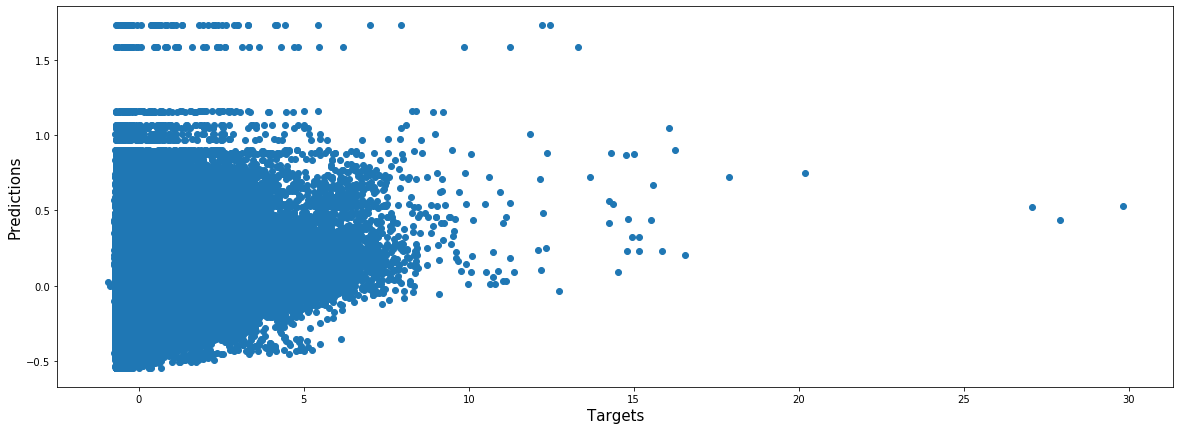

In [84]:
plt.scatter(y_train, y_pred)
plt.xlabel('Targets', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.show()

## Decision Tree Regressor 

In [77]:
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [78]:
y_pred = dt.predict(x_train)

## Decision Tree Regressor Model Evaluation 

In [79]:
print("DT- Regressor - Mean Absolute Error: ", metrics.mean_absolute_error(y_train, y_pred)) 
print("DT- Regressor - Mean Square Error: ", metrics.mean_squared_error(y_train, y_pred)) 
print("DT- Regressor - Root Mean Square Error: ", np.sqrt(metrics.mean_squared_error(y_train, y_pred)))


score = r2_score(y_train, y_pred)
print("R^2:", score)

DT- Regressor - Mean Absolute Error:  0.6458107853826067
DT- Regressor - Mean Square Error:  0.9519324256049626
DT- Regressor - Root Mean Square Error:  0.9756702442961774
R^2: 0.053232285452038064


In [80]:
DT = pd.DataFrame({'Model_Name':['Decision Tree Regressor'],
                   'MAE':[metrics.mean_absolute_error(y_train, y_pred)],
                   'MSE': [metrics.mean_squared_error(y_train, y_pred)],
                   'RMSE': [metrics.mean_squared_error(y_train, y_pred)],
                   'R^2': [r2_score(y_train, y_pred)]})

In [81]:
DT

,Model_Name,MAE,MSE,RMSE,R^2
0,Decision Tree Regressor,0.645811,0.951932,0.951932,0.053232


## Scatter Plot between Targets and the Predictions- DT Regressor Model

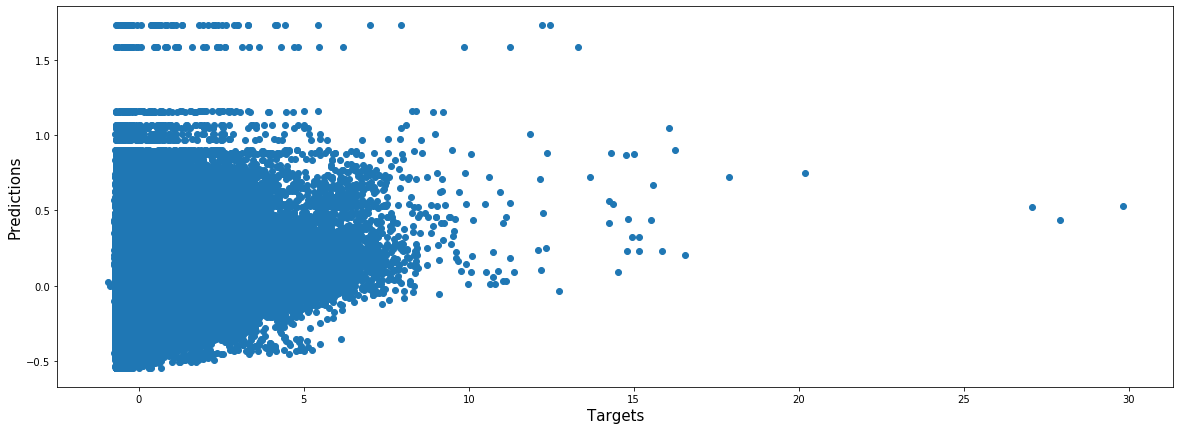

In [83]:
plt.scatter(y_train, y_pred)
plt.xlabel('Targets', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.show()

## Random Forest Regressor 

In [45]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(x_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [46]:
y_pred = rf.predict(x_train)

## Random Forest Regressor Model Evaluation 

In [47]:
print("RF- Regressor - Mean Absolute Error: ", metrics.mean_absolute_error(y_train, y_pred)) 
print("RF- Regressor - Mean Square Error: ", metrics.mean_squared_error(y_train, y_pred)) 
print("RF- Regressor - Root Mean Square Error: ", np.sqrt(metrics.mean_squared_error(y_train, y_pred)))


score = r2_score(y_train, y_pred)
print("R^2:", score)

RF- Regressor - Mean Absolute Error:  0.6458211644334628
RF- Regressor - Mean Square Error:  0.9520286605835275
RF- Regressor - Root Mean Square Error:  0.9757195604186315
R^2: 0.05313657259651927


In [48]:
RF= pd.DataFrame({'Model_Name':['Random Forest Regressor'],
                  'MAE':[metrics.mean_absolute_error(y_train, y_pred)],
                   'MSE': [metrics.mean_squared_error(y_train, y_pred)],
                   'RMSE': [metrics.mean_squared_error(y_train, y_pred)],
                   'R^2': [r2_score(y_train, y_pred)]})

In [49]:
RF

,Model_Name,MAE,MSE,RMSE,R^2
0,Random Forest Regressor,0.645821,0.952029,0.952029,0.053137


## Scatter Plot between Targets and the Predictions- RF Regressor Model

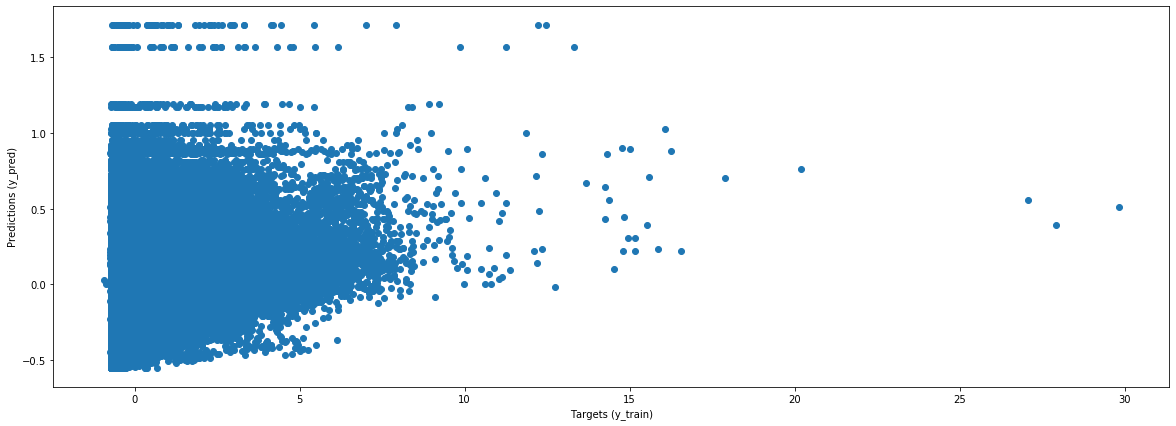

In [50]:
plt.scatter(y_train, y_pred)
plt.xlabel('Targets (y_train)')
plt.ylabel('Predictions (y_pred)')
plt.show()

## Ridge Regression 

In [51]:
rid = Ridge()
rid.fit(x_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [52]:
y_pred = rid.predict(x_train)

## Ridge Regression Model Evaluation 

In [53]:
print("RR - Mean Absolute Error: ", metrics.mean_absolute_error(y_train, y_pred)) 
print("RR - Mean Square Error: ", metrics.mean_squared_error(y_train, y_pred)) 
print("RR - Root Mean Square Error: ", np.sqrt(metrics.mean_squared_error(y_train, y_pred)))


score = r2_score(y_train, y_pred)
print("R^2:", score)

RR - Mean Absolute Error:  0.6683452496909509
RR - Mean Square Error:  1.005454209045567
RR - Root Mean Square Error:  1.00272339607968
R^2: 8.845420532699322e-07


In [54]:
RR = pd.DataFrame({'Model_Name':['Ridge Regression'],
                   'MAE':[metrics.mean_absolute_error(y_train, y_pred)],
                   'MSE': [metrics.mean_squared_error(y_train, y_pred)],
                   'RMSE': [metrics.mean_squared_error(y_train, y_pred)],
                   'R^2': [r2_score(y_train, y_pred)]})

In [55]:
RR

,Model_Name,MAE,MSE,RMSE,R^2
0,Ridge Regression,0.668345,1.005454,1.005454,8.845421e-07


## Scatter Plot between Targets and the Predictions- RR Model

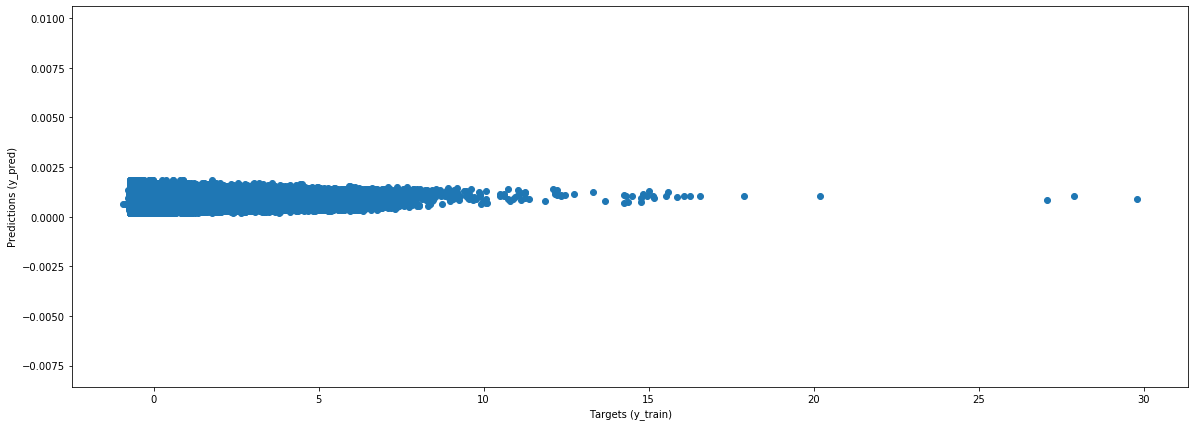

In [56]:
plt.scatter(y_train, y_pred)
plt.xlabel('Targets (y_train)')
plt.ylabel('Predictions (y_pred)')
plt.show()

## Lasso Regression 

In [57]:
las = Lasso()
las.fit(x_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [58]:
y_pred = las.predict(x_train)

## Lasso Regression Model Evaluation

In [59]:
print("LR - Mean Absolute Error: ", metrics.mean_absolute_error(y_train, y_pred)) 
print("LR - Mean Square Error: ", metrics.mean_squared_error(y_train, y_pred)) 
print("LR - Root Mean Square Error: ", np.sqrt(metrics.mean_squared_error(y_train, y_pred)))


score = r2_score(y_train, y_pred)
print("R^2:", score)

LR - Mean Absolute Error:  0.6683441654152502
LR - Mean Square Error:  1.0054550984128843
LR - Root Mean Square Error:  1.00272383955548
R^2: 0.0


In [60]:
LaR = pd.DataFrame({'Model_Name':['Lasso Regression'],
                   'MAE':[metrics.mean_absolute_error(y_train, y_pred)],
                   'MSE': [metrics.mean_squared_error(y_train, y_pred)],
                   'RMSE': [metrics.mean_squared_error(y_train, y_pred)],
                    'R^2': [r2_score(y_train, y_pred)]})

In [61]:
LaR

,Model_Name,MAE,MSE,RMSE,R^2
0,Lasso Regression,0.668344,1.005455,1.005455,0.0


## Scatter Plot between Targets and the Predictions- LaR Model

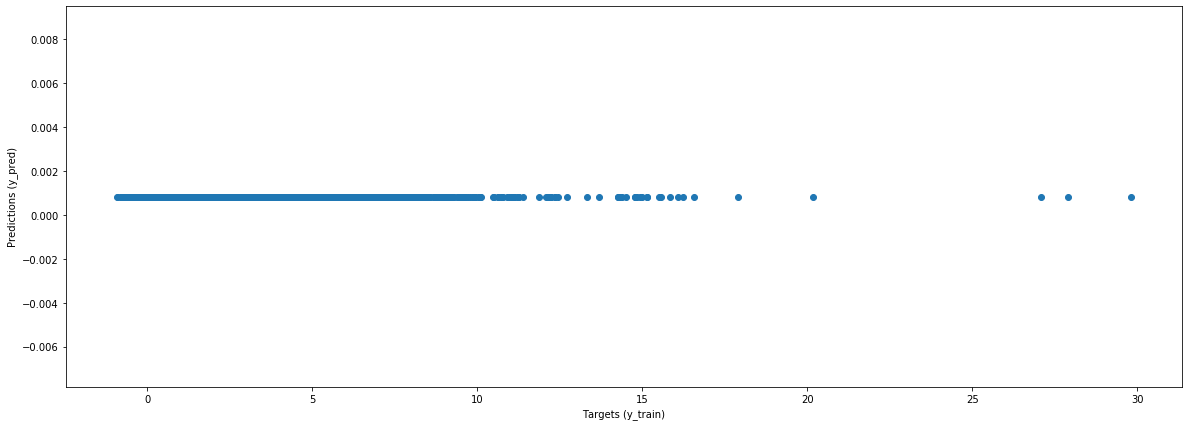

In [62]:
plt.scatter(y_train, y_pred)
plt.xlabel('Targets (y_train)')
plt.ylabel('Predictions (y_pred)')
plt.show()

## Comparision of Different linear Models and their Respective Results

In [63]:
frames = [LR,KNN,DT,RF,RR,LaR]
Model_Results = pd.concat(frames)
Model_Results.reset_index(drop=True, inplace=True)

In [66]:
Model_Results.round(2)

,Model_Name,MAE,MSE,RMSE,R^2
0,Linear Regression,0.67,1.01,1.01,0.00
1,KNN Regressor,0.70,1.14,1.14,-0.13
2,Decision Tree Regressor,0.65,0.95,0.95,0.05
3,Random Forest Regressor,0.65,0.95,0.95,0.05
4,Ridge Regression,0.67,1.01,1.01,0.00
5,Lasso Regression,0.67,1.01,1.01,0.00


## Visualization of Various Model Results

                Model_Name   MAE   MSE  RMSE   R^2
0        Linear Regression  0.67  1.01  1.01  0.00
1            KNN Regressor  0.70  1.14  1.14 -0.13
2  Decision Tree Regressor  0.65  0.95  0.95  0.05
3  Random Forest Regressor  0.65  0.95  0.95  0.05
4         Ridge Regression  0.67  1.01  1.01  0.00
5         Lasso Regression  0.67  1.01  1.01  0.00


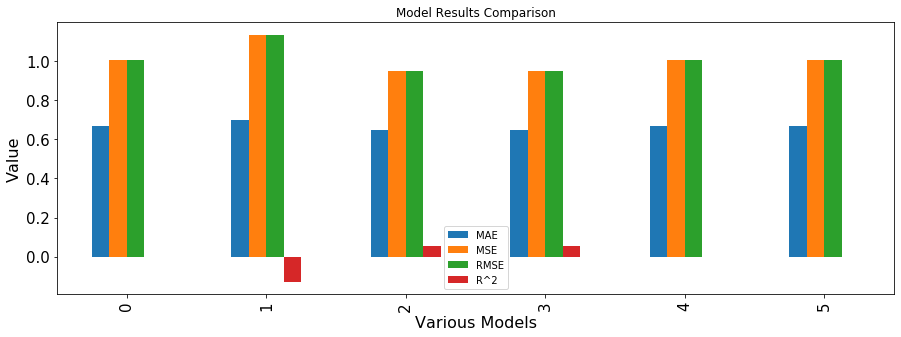

In [69]:
print(Model_Results.round(2))
mr = Model_Results[['MAE','MSE','RMSE','R^2']].plot(kind='bar', title ="Model Results Comparison", figsize=(15, 5), legend=True, fontsize=15)
mr.set_xlabel("Various Models", fontsize=16)
mr.set_ylabel("Value", fontsize=16)
plt.show()

### Overall Random Forest and Decision Tree tops the list when compared with other algorithms respectively with accuracy more than 05 Percentage and less Mean square error and Root mean square error. 

## Implementation of Cluster Method

## KMeans Algorithm

In [91]:
from sklearn.cluster import KMeans
plt.rcParams['figure.figsize']= (20,7)

In [94]:
kmeans = KMeans(2)
kmeans.fit(ranges)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [99]:
ranges['clusters_pred'] = kmeans.fit_predict(ranges)

In [100]:
ranges.head(2)

,Temperature,Weekly_Sales,clusters_pred
0,5.54,817485.14,0
1,6.23,1083071.14,0


## Before Clustering

Text(0.5, 0, 'Temperature')

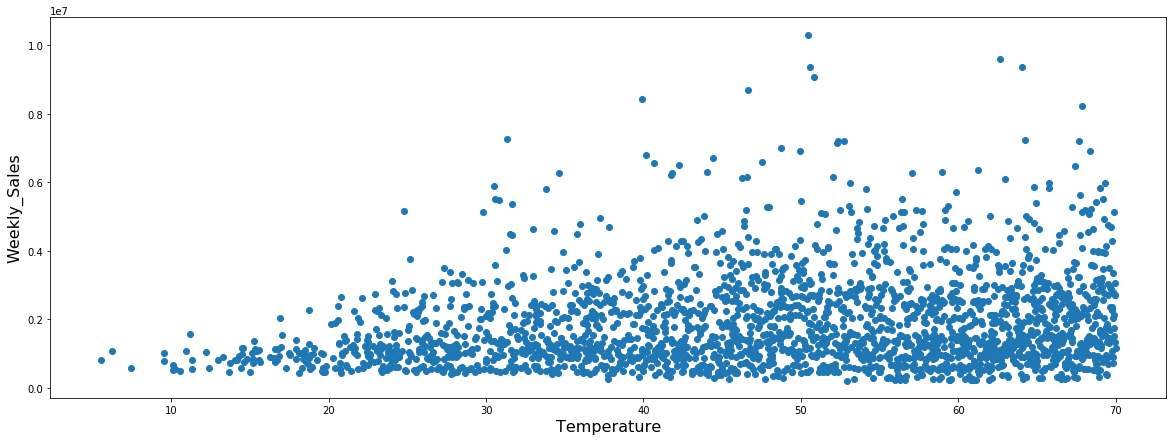

In [101]:
plt.figure()
plt.scatter(ranges['Temperature'] , ranges['Weekly_Sales'])
plt.ylabel('Weekly_Sales',fontsize=16)
plt.xlabel('Temperature', fontsize=16)

## After Clustering

Text(0.5, 0, 'Temperature')

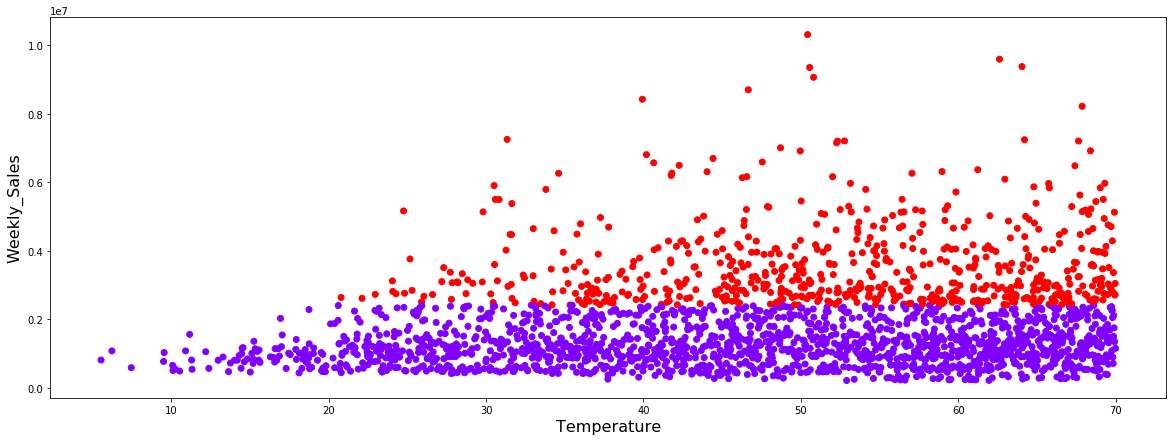

In [102]:
plt.scatter(ranges['Temperature'], ranges['Weekly_Sales'], c= ranges['clusters_pred'], cmap = 'rainbow')
plt.ylabel('Weekly_Sales',fontsize=16)
plt.xlabel('Temperature', fontsize=16)

### Explanation : We can see more sales happened in temperature ranges from 40 to 50 Farenheit.